In [5]:
from web_scr import Scraper
import pandas as pd

In [6]:
sc = Scraper()
dane = sc.scrape_pages(20)

Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no attribute 'get_text'
Problem with scraping website, reason: 'NoneType' object has no a

In [7]:
unique_keys = set()
for item in dane:
    for d in item:
        unique_keys.update(d.keys())

flat_dict = {key: [] for key in unique_keys}

for item in dane:
    temp_dict = {}
    for d in item:
        temp_dict.update(d)
    for key in flat_dict.keys():
        flat_dict[key].append(temp_dict.get(key, None))

df = pd.DataFrame(flat_dict)
df.to_csv('dane.csv', index=False)

In [8]:
df

,Leasing,Spalanie W Cyklu Mieszanym,Generacja,Skrzynia biegów,Rok produkcji,Kierownica po prawej (Anglik),Pojemność skokowa,Pojemność baterii,Liczba pozostałych rat,Kraj pochodzenia,...,Okres gwarancji producenta,Pokaż oferty z numerem VIN,Pierwszy właściciel (od nowości),Serwisowany w ASO,Liczba miejsc,Marka pojazdu,Spalanie W Mieście,Uszkodzony,Średnie zużycie,Typ nadwozia
0,Tak,None,K (2015-2021),Manualna,2019,None,1 199 cm3,None,None,Polska,...,None,Tak,Tak,Tak,5,Opel,None,None,None,Kompakt
1,None,None,I (2010-2018),Manualna,2014,None,1 997 cm3,None,None,Belgia,...,None,Tak,None,None,5,Peugeot,None,None,None,Kombi
2,Tak,None,R231 (2012-2020),Automatyczna,2023,None,3 982 cm3,None,None,Polska,...,None,Tak,Tak,Tak,4,Mercedes-Benz,None,None,None,Kabriolet
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,I (2002-2013),Manualna,2012,None,1 753 cm3,None,None,Austria,...,None,Tak,None,None,2,Ford,None,None,None,Minivan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,None,None,II (2007-2014),Manualna,2012,None,1 197 cm3,None,None,Polska,...,None,Tak,None,None,5,Skoda,6 l/100km,None,None,Auta miejskie
709,Tak,None,G20/G21 (2019-),Automatyczna,2021,None,1 995 cm3,None,None,Polska,...,13 Kwietnia 2024,Tak,Tak,Tak,5,BMW,None,None,None,Kombi
710,None,None,T5,Manualna,2005,None,1 896 cm3,None,None,Polska,...,None,Tak,None,Tak,9,Volkswagen,None,None,None,Minivan
711,None,None,II FL (2003-),Manualna,2011,None,1 242 cm3,None,None,None,...,None,Tak,None,None,4,Fiat,None,None,None,Kompakt


## Analiza danych 
 1. Jaka marka jest najczęściej? 
 2. Wykres cen (histogram) 
 3. Wykres roku produkcji (histogram) 
 4. Procent aut z skrzynią biegów (wykres kołowy) 
 5. Procent ofert od prywatnych i firm
 6. Wykres typów 


In [19]:
marki_num= df.groupby('Marka pojazdu').size().reset_index(name='ilość')

In [20]:
marki_num

,Marka pojazdu,ilość
0,Audi,51
1,BMW,66
2,Cadillac,1
3,Chevrolet,4
4,Chrysler,1
5,Citroën,12
6,Cupra,5
7,Dacia,5
8,Dodge,4
9,Fiat,7


In [21]:

import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Mercedes-Benz'),
  Text(1, 0, 'Volkswagen'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'Audi'),
  Text(4, 0, 'Opel'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'Volvo'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Peugeot'),
  Text(9, 0, 'Skoda'),
  Text(10, 0, 'Kia'),
  Text(11, 0, 'Renault'),
  Text(12, 0, 'Seat'),
  Text(13, 0, 'Hyundai'),
  Text(14, 0, 'Citroën'),
  Text(15, 0, 'Nissan'),
  Text(16, 0, 'Jeep'),
  Text(17, 0, 'Mazda'),
  Text(18, 0, 'Honda'),
  Text(19, 0, 'Lexus')])

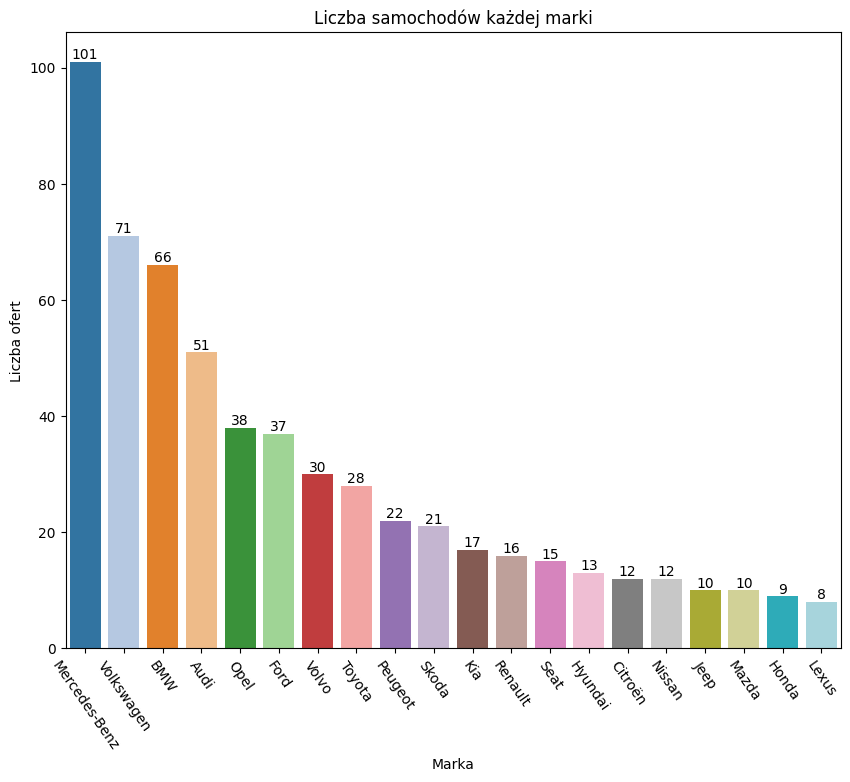

In [65]:
plt.figure(figsize=(10, 8))  
ax = sns.barplot(x='Marka pojazdu', y='ilość', data=marki_num.sort_values(by='ilość', ascending=False).head(20), orient='v', palette='tab20')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Marka')
plt.ylabel('Liczba ofert')
plt.title('Liczba samochodów każdej marki')
plt.xticks(rotation=305) 

In [55]:
ceny = df['Cena']
ceny

0       54 900
1       29 500
2      962 599
3         None
4       19 900
        ...   
708     25 000
709    134 000
710     28 000
711     23 000
712       None
Name: Cena, Length: 713, dtype: object

In [73]:
lata = df['Rok produkcji'].sort_values()

In [75]:
lata

643    1975
544    1982
197    1982
381    1991
419    1992
       ... 
676    None
680    None
686    None
692    None
712    None
Name: Rok produkcji, Length: 713, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, '1975'),
  Text(1, 0, '1982'),
  Text(2, 0, '1991'),
  Text(3, 0, '1992'),
  Text(4, 0, '1995'),
  Text(5, 0, '1996'),
  Text(6, 0, '1997'),
  Text(7, 0, '1998'),
  Text(8, 0, '2000'),
  Text(9, 0, '2001'),
  Text(10, 0, '2002'),
  Text(11, 0, '2003'),
  Text(12, 0, '2004'),
  Text(13, 0, '2005'),
  Text(14, 0, '2006'),
  Text(15, 0, '2007'),
  Text(16, 0, '2008'),
  Text(17, 0, '2009'),
  Text(18, 0, '2010'),
  Text(19, 0, '2011'),
  Text(20, 0, '2012'),
  Text(21, 0, '2013'),
  Text(22, 0, '2014'),
  Text(23, 0, '2015'),
  Text(24, 0, '2016'),
  Text(25, 0, '2017'),
  Text(26, 0, '2018'),
  Text(27, 0, '2019'),
  Text(28, 0, '2020'),
  Text(29, 0, '2021'),
  Text(30, 0, '2022'),
  Text(31, 0, '2023'),
  Text(32, 0, '2024')])

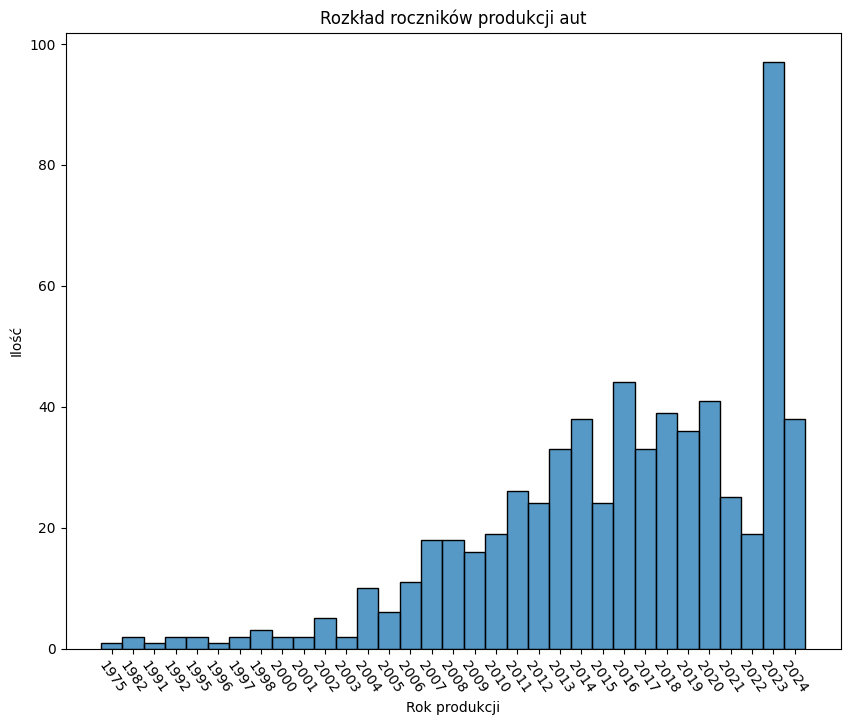

In [109]:
plt.figure(figsize=(10,8))
sns.histplot(lata, bins=10)
plt.ylabel('Ilość')
plt.xlabel('Rok produkcji')
plt.title('Rozkład roczników produkcji aut')
plt.xticks(rotation=305) 


In [112]:
biegi = df.groupby('Skrzynia biegów').size().reset_index(name='Ilość')
filt = (biegi['Skrzynia biegów'] == 'Manualna')
filt2 = (biegi['Skrzynia biegów'] == 'Automatyczna')
man = biegi[filt]['Ilość'].iloc[0]
aut = biegi[filt2]['Ilość'].iloc[0]
proc_man = round(man/(man+aut)*100, 2)
proc_aut = round(aut/(man+aut)*100, 2)
procenty = [proc_man, proc_aut]
labels = ['manualna', 'automatyczna']
procenty

[44.53, 55.47]

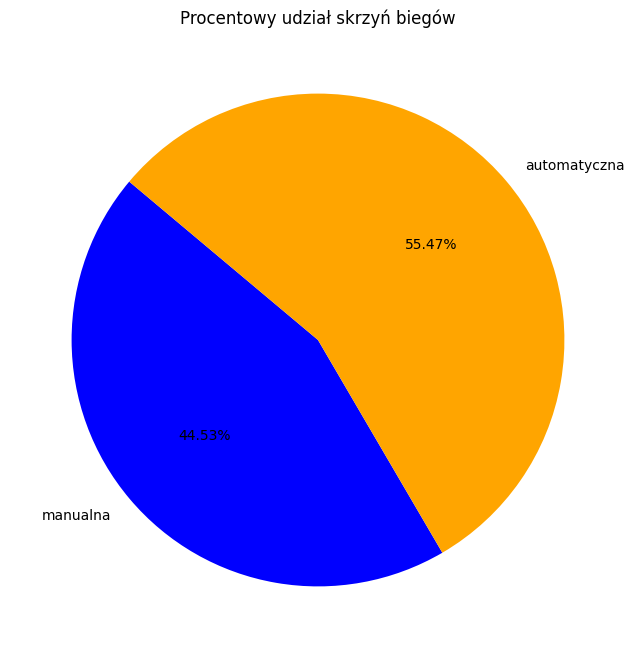

In [116]:
plt.figure(figsize=(8, 8))
plt.pie(procenty, labels=labels, autopct='%1.2f%%', startangle=140, colors=['blue', 'orange', 'gray'])
plt.title('Procentowy udział skrzyń biegów')
plt.show()

In [118]:
oferty = df.groupby('Oferta od').size().reset_index(name='Ilość')
filt = (oferty['Oferta od'] == 'Firma')
filt2 = (oferty['Oferta od'] == 'Prywatne')
f = oferty[filt]['Ilość'].iloc[0]
p = oferty[filt2]['Ilość'].iloc[0]
proc_f = round(f/(f+p)*100, 2)
proc_p = round(p/(f+p)*100, 2)
procenty = [proc_f, proc_p]
labels = ['firma', 'prywatne']
procenty

[29.22, 70.78]

In [117]:
df['Oferta od'].unique()

array(['Firma', 'Prywatne', None], dtype=object)

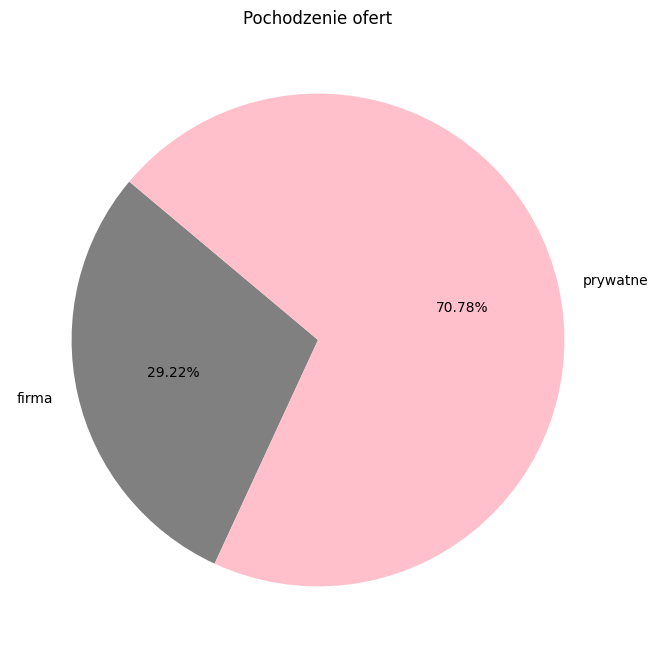

In [121]:
plt.figure(figsize=(8, 8))
plt.pie(procenty, labels=labels, autopct='%1.2f%%', startangle=140, colors=['grey', 'pink'])
plt.title('Pochodzenie ofert')
plt.show()

In [122]:
df['Typ nadwozia'].unique()

array(['Kompakt', 'Kombi', 'Kabriolet', None, 'Minivan', 'SUV', 'Sedan',
       'Auta małe', 'Auta miejskie', 'Coupe'], dtype=object)

In [123]:
typy = df.groupby('Typ nadwozia').size().reset_index(name='Ilość')

Text(0.5, 1.0, 'Liczba samochodów każdego typu')

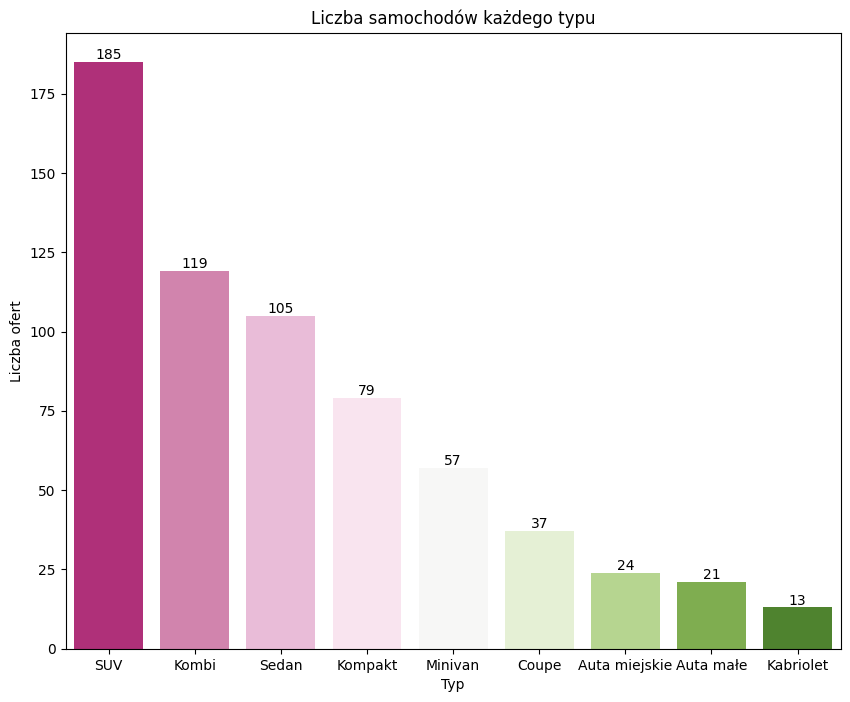

In [125]:
plt.figure(figsize=(10, 8))  
ax = sns.barplot(x='Typ nadwozia', y='Ilość', data=typy.sort_values(by='Ilość', ascending=False).head(20), orient='v', palette='PiYG')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Typ')
plt.ylabel('Liczba ofert')
plt.title('Liczba samochodów każdego typu')

In [127]:
df.columns

Index(['Leasing', 'Spalanie W Cyklu Mieszanym', 'Generacja', 'Skrzynia biegów',
       'Rok produkcji', 'Kierownica po prawej (Anglik)', 'Pojemność skokowa',
       'Pojemność baterii', 'Liczba pozostałych rat', 'Kraj pochodzenia',
       'Opłata początkowa', 'Oferta od', 'Rodzaj paliwa', 'Wartość wykupu',
       'Rodzaj koloru', 'Moc', 'Rodzaj własności baterii',
       'Gwarancja dealerska (w cenie)', 'Napęd', 'Tuning', 'Kolor',
       'Bezwypadkowy', 'Przebieg', 'Możliwość finansowania',
       'Ma numer rejestracyjny',
       'Data pierwszej rejestracji w historii pojazdu',
       'Homologacja ciężarowa', 'Spalanie Poza Miastem', 'Model pojazdu',
       'Liczba drzwi', 'VAT marża', 'Faktura VAT',
       'Numer rejestracyjny pojazdu', 'Emisja CO2', 'Autonomia', 'Stan',
       'Cena', 'lub do (przebieg km)', 'Wersja', 'Miesięczna rata',
       'Zarejestrowany w Polsce', 'Okres gwarancji producenta',
       'Pokaż oferty z numerem VIN', 'Pierwszy właściciel (od nowości)',
       'Serw

## Predykcja ceny auta pod względem kilku cech, ale jakich? 
- marka, typ, rocznik, skrzynia, paliwo, kolor, przebieg, stan, liczba dzwi, liczba miejsc, pojemność skokowa, moc, napęd, cena 

In [148]:
columns_value = ['Rok produkcji', 'Liczba drzwi', 'Liczba miejsc']
for i in columns_value:
    df[i] = df[i].dropna().astype(int)

In [133]:
df['Przebieg'] = df['Przebieg'].dropna().str.replace('km', '').str.replace(' ', '').astype(int)

In [134]:
df['Pojemność skokowa'] = df['Pojemność skokowa'].dropna().str.replace('cm3', '').str.replace(' ', '').astype(int)

In [140]:
df['Moc'] = df['Moc'].dropna().str.replace('KM', '').str.replace(' ', '').astype(int)

In [146]:
df['Cena'] = df['Cena'].dropna().str.replace(',', '.').str.replace(' ', '').astype(float)

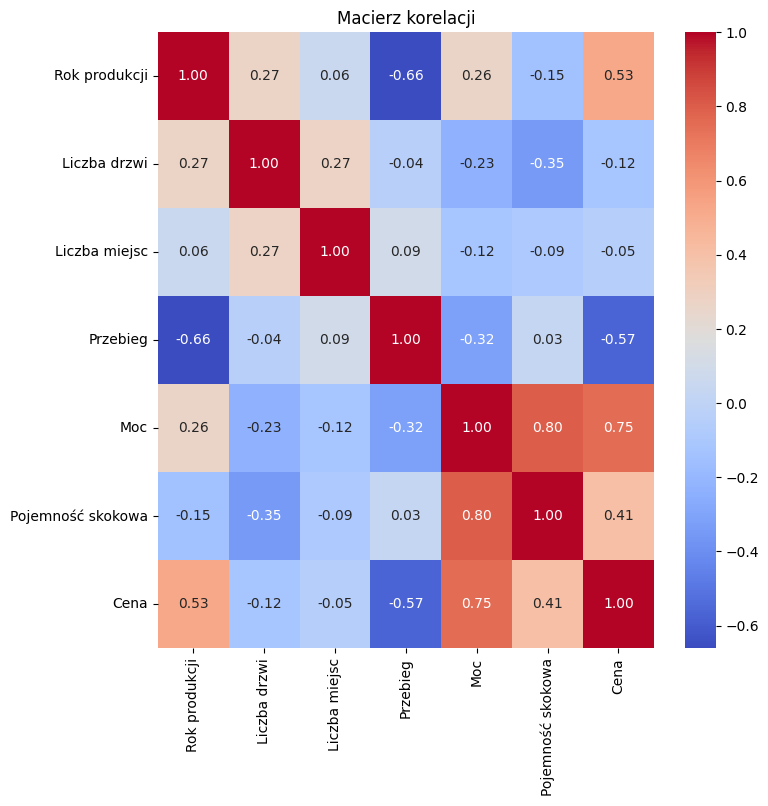

In [159]:
columns = ['Rok produkcji', 'Liczba drzwi', 'Liczba miejsc', 'Przebieg', 'Moc', 'Pojemność skokowa', 'Cena']
correlation_matrix = df[columns].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

Widzimy, że pojemność z mocą ma współczynnik 0.8, a rok z przebiegiem 0.66, największą korelacje z ceną ma moc, przebieg, rok

In [160]:
columns_feature = ['Marka pojazdu', 'Typ nadwozia', 'Skrzynia biegów', 'Rodzaj paliwa', 'Kolor', 'Stan', 'Rok produkcji', 'Liczba drzwi', 'Liczba miejsc', 'Przebieg', 'Moc', 'Pojemność skokowa', 'Cena']


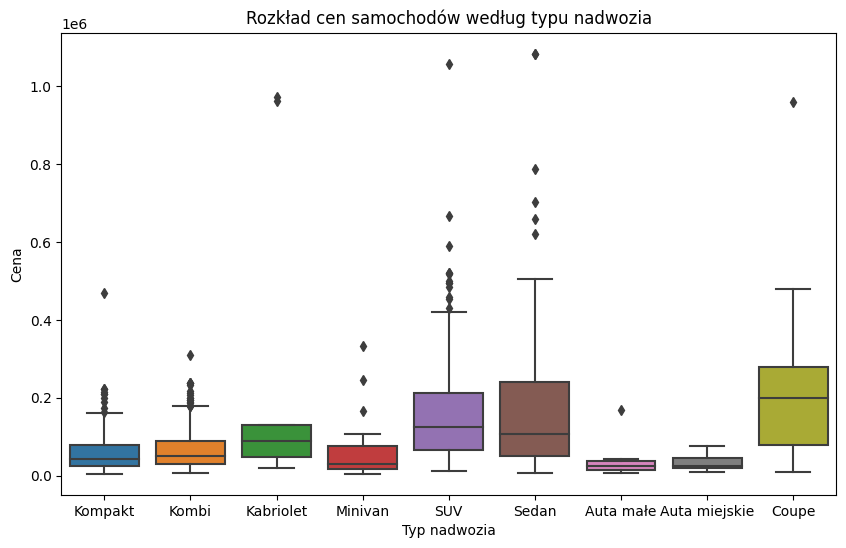

In [161]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Typ nadwozia', y='Cena', data=df)
plt.title('Rozkład cen samochodów według typu nadwozia')
plt.xlabel('Typ nadwozia')
plt.ylabel('Cena')
plt.show()

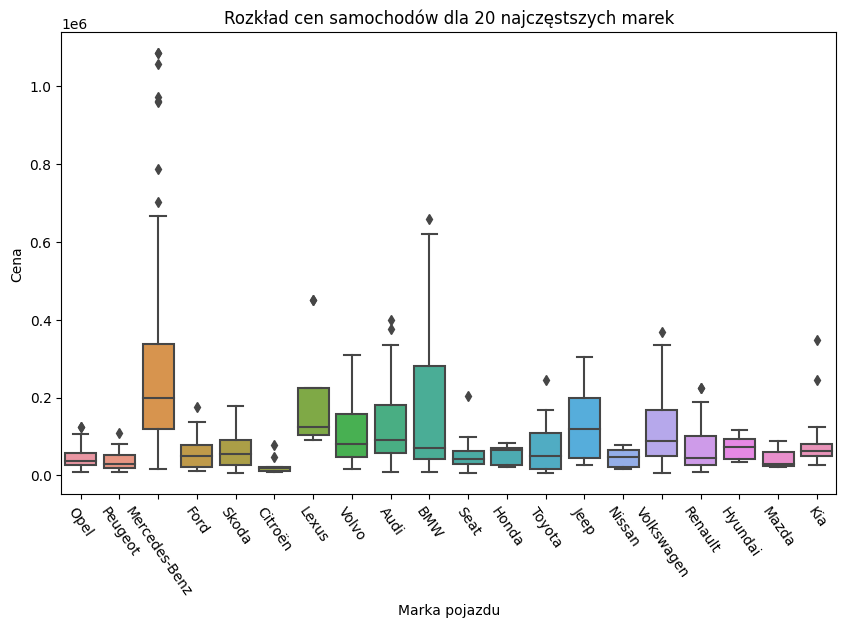

In [165]:
top_20_marki = df['Marka pojazdu'].value_counts().head(20).index

df_top_20 = df[df['Marka pojazdu'].isin(top_20_marki)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Marka pojazdu', y='Cena', data=df_top_20)
plt.title('Rozkład cen samochodów dla 20 najczęstszych marek')
plt.xlabel('Marka pojazdu')
plt.ylabel('Cena')
plt.xticks(rotation=305)  # Obrócenie etykiet na osi X dla czytelności
plt.show()

# Ocena czy skrzynia wpływa na cenę auta - testy statystyczne

In [176]:
from scipy.stats import chi2_contingency

def test(cecha):
    tablica_przestawna = pd.crosstab(df[cecha], df['Cena'])
    
    chi2, p_value, dof, expected = chi2_contingency(tablica_przestawna)
    
    alpha = 0.05
    print("Wartość statystyki chi-kwadrat:", chi2)
    print("Wartość p:", p_value)
    print("Stopnie swobody:", dof)
    if p_value < alpha:
        print(f"Odrzucamy hipotezę zerową - istnieje istotny związek między {cecha} a ceną samochodu.")
    else:
        print(f"Nie ma podstaw do odrzucenia hipotezy zerowej - brak istotnego związku między {cecha} a ceną samochodu.")

In [177]:
test('Rodzaj paliwa')

Wartość statystyki chi-kwadrat: 2594.5611606693956
Wartość p: 1.3065523223188339e-17
Stopnie swobody: 2010
Odrzucamy hipotezę zerową - istnieje istotny związek między Rodzaj paliwa a ceną samochodu.


In [178]:
test('Skrzynia biegów')

Wartość statystyki chi-kwadrat: 524.8992528269029
Wartość p: 3.4349342069502124e-05
Stopnie swobody: 402
Odrzucamy hipotezę zerową - istnieje istotny związek między Skrzynia biegów a ceną samochodu.


In [179]:
test('Stan')

Wartość statystyki chi-kwadrat: 613.4152529179466
Wartość p: 4.9880128182522536e-11
Stopnie swobody: 402
Odrzucamy hipotezę zerową - istnieje istotny związek między Stan a ceną samochodu.


In [180]:
test('Kolor')

Wartość statystyki chi-kwadrat: 7542.401387069638
Wartość p: 8.212859732180785e-21
Stopnie swobody: 6432
Odrzucamy hipotezę zerową - istnieje istotny związek między Kolor a ceną samochodu.


In [186]:
test('Typ nadwozia')

Wartość statystyki chi-kwadrat: 3885.747980833731
Wartość p: 2.233535192579901e-15
Stopnie swobody: 3216
Odrzucamy hipotezę zerową - istnieje istotny związek między Typ nadwozia a ceną samochodu.


In [187]:
test('Marka pojazdu')

Wartość statystyki chi-kwadrat: 18291.45045814044
Wartość p: 6.393263847633585e-45
Stopnie swobody: 15678
Odrzucamy hipotezę zerową - istnieje istotny związek między Marka pojazdu a ceną samochodu.


In [181]:
def tabela_means(cecha):
    dff = df.groupby(cecha)['Cena'].mean().reset_index(name='Średnia')
    return dff[[cecha, 'Średnia']]
    

In [182]:
tabela_means('Rodzaj paliwa')

,Rodzaj paliwa,Średnia
0,Benzyna,130106.795666
1,Benzyna+LPG,36887.500000
2,Diesel,95592.419231
3,Elektryczny,354513.160000
4,Hybryda,178686.600000
5,Hybryda Plug-in,231000.000000


In [183]:
tabela_means('Skrzynia biegów')

,Skrzynia biegów,Średnia
0,Automatyczna,189236.611268
1,Manualna,42329.315789


In [184]:
tabela_means('Kolor')

,Kolor,Średnia
0,Beżowy,47772.000000
1,Biały,117744.269565
2,Bordowy,64166.555556
3,Brązowy,91047.368421
4,Błękitny,55591.666667
5,Czarny,158436.285714
6,Czerwony,126441.500000
7,Fioletowy,134747.500000
8,Granatowy,138770.000000
9,Inny kolor,74506.444444


In [185]:
tabela_means('Stan')

,Stan,Średnia
0,Nowe,288166.448819
1,Używane,83130.044834


In [188]:
tabela_means('Marka pojazdu')

,Marka pojazdu,Średnia
0,Audi,127655.862745
1,BMW,168198.000000
2,Cadillac,49900.000000
3,Chevrolet,69474.750000
4,Chrysler,10500.000000
5,Citroën,23458.083333
6,Cupra,202950.200000
7,Dacia,57659.600000
8,Dodge,94749.750000
9,Fiat,22928.428571


In [189]:
tabela_means('Typ nadwozia')

,Typ nadwozia,Średnia
0,Auta małe,31328.380952
1,Auta miejskie,32337.416667
2,Coupe,211931.567568
3,Kabriolet,209053.692308
4,Kombi,76941.495798
5,Kompakt,68610.227848
6,Minivan,50574.210526
7,SUV,166726.956757
8,Sedan,180440.276190


# Podsuwmowując do predykcji cen pojazdu warto wziąć takie cechy : 
- typ nadwozia
- marka pojazdu 
- stan 
- kolor
- skrzynia biegów 
- rodzaj paliwa
- moc 
- przebieg 
- rok produkcji 